# Happiness Report 2021 Analysis
The World Happiness Report is a landmark survey of the state of global happiness. Published annually by the United Nations Sustainable Development Solutions Network, it ranks countries by how happy their citizens perceive themselves to be. This analysis explores the 2021 edition of the report, which provides happiness indexes for every country around the globe.
Data source: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021.

## Objectives Of The Analysis
With this project we'd like to discover:
- The patterns that make a country happy and all the related correlations (how GDP per capita, social support, and healthy life expectancy influence the happiness score)
- What regions of the world are happier and why
- Does economic prosperity always make a country happy?

In [2]:
# We import pandas and other needed libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# We read the csv file with pandas and save it as df.
df = pd.read_csv('world-happiness-report-2021.csv')

In [4]:
# Viewing dataframe's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [5]:
# Viewing dataframe's first 5 entries
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## Data Cleaning and Preparation

In [6]:
# We check for missing values in our dataset. In this dataset there are no missing values.
# If we had missing values, we would have to choose between truncating the columns of the missing values, or to use estimates through methods like median, etc.
df.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [7]:
# We now check for duplicate rows in our dataset. There are none.
df.duplicated().sum()

0

In [8]:
# We check the data types for each column. There is no need to reformat something, every column has the right data type.
df.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Ladder score in Dystopia                      float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of

In [9]:
# We get rid of the "Explained by" columns which are not relevant for our analysis.
drop_columns = [col for col in df.columns if 'Explained by' in col]
df = df.drop(columns=drop_columns)
df.head()


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,2.798


## Correlation Analysis
**We want to understand how much GDP and quality of life impacts a country's happiness.**

In [13]:
# We round up our value to 2 decimals for better clarity.
gdp_happiness_correlation = round(df['Logged GDP per capita'].corr(df['Ladder score']), 2)

In [14]:
# The correlation between GDP per capita and the ladder score is 0.79, which indicates a strong positive correlation between GDP per capita and happiness.
gdp_happiness_correlation

0.79

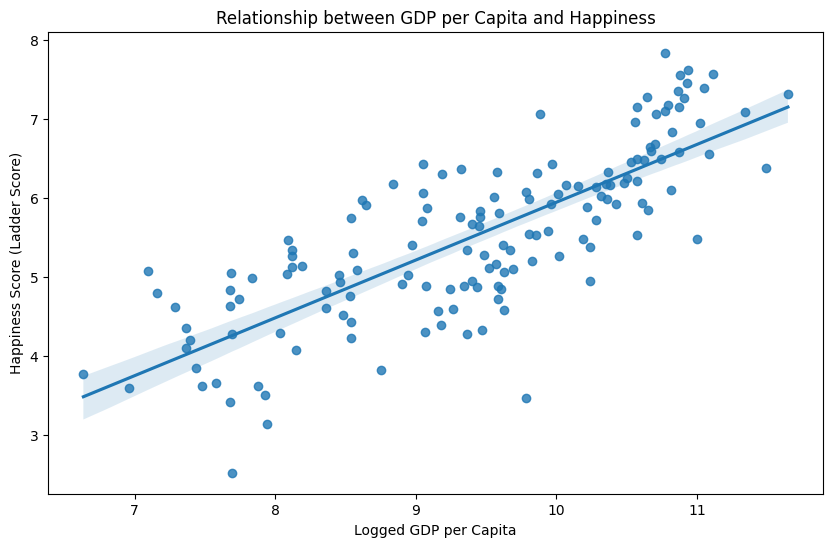

In [16]:
# Let's create a scatter plot to better visualize our data
plt.figure(figsize=(10, 6))
sns.regplot(x='Logged GDP per capita', y='Ladder score', data=df)
plt.title('Relationship between GDP per Capita and Happiness')
plt.xlabel('Logged GDP per Capita')
plt.ylabel('Happiness Score (Ladder Score)')
plt.show()

As we can see in the graph, GDP impacts a lot on a country's happiness. Let's try to see if there is a country with low GDP per capita that is happier than any rich country though.

In [17]:
low_gdp_threshold = df['Logged GDP per capita'].quantile(0.25)
high_gpd_threshold = df['Logged GDP per capita'].quantile(0.75)

In [18]:
low_gdp_countries = df[df['Logged GDP per capita'] <= low_gdp_threshold]
high_gdp_countries = df[df['Logged GDP per capita'] >= high_gpd_threshold]

In [20]:
happiest_low_gdp_country = low_gdp_countries.loc[low_gdp_countries['Ladder score'].idxmax()]
least_happy_high_gdp_country = high_gdp_countries.loc[high_gdp_countries['Ladder score'].idxmin()]

In [21]:
happiest_low_gdp_country

Country name                                              Kyrgyzstan
Regional indicator                Commonwealth of Independent States
Ladder score                                                   5.744
Standard error of ladder score                                 0.046
upperwhisker                                                   5.834
lowerwhisker                                                   5.653
Logged GDP per capita                                          8.538
Social support                                                 0.893
Healthy life expectancy                                       64.401
Freedom to make life choices                                   0.935
Generosity                                                     0.119
Perceptions of corruption                                      0.908
Ladder score in Dystopia                                        2.43
Dystopia + residual                                            2.648
Name: 66, dtype: object

In [22]:
least_happy_high_gdp_country

Country name                      Hong Kong S.A.R. of China
Regional indicator                                East Asia
Ladder score                                          5.477
Standard error of ladder score                        0.049
upperwhisker                                          5.573
lowerwhisker                                           5.38
Logged GDP per capita                                  11.0
Social support                                        0.836
Healthy life expectancy                               76.82
Freedom to make life choices                          0.717
Generosity                                            0.067
Perceptions of corruption                             0.403
Ladder score in Dystopia                               2.43
Dystopia + residual                                   1.236
Name: 76, dtype: object

## Happiness based on regions in the world

In [ ]:
# Grouping the data by region and calculating mean happiness score and other factors
regional_analysis = happiness_data.groupby('Regional indicator').mean()[columns_of_interest]

# Sorting regions by the happiness score
sorted_regional_analysis = regional_analysis.sort_values(by='Ladder score', ascending=False)

# Plotting the results
plt.figure(figsize=(14, 8))
sns.barplot(x=sorted_regional_analysis['Ladder score'], y=sorted_regional_analysis.index)
plt.title('Average Happiness Score by Region')
plt.xlabel('Average Happiness Score')
plt.ylabel('Region')
plt.show()

sorted_regional_analysis


In [77]:
# Let's group the data by region and calculate mean happiness score and other factors
regional_df = df.groupby('Regional indicator').mean()[columns]

TypeError: Could not convert Czech RepublicSloveniaKosovoSlovakiaLithuaniaEstoniaPolandRomaniaSerbiaLatviaHungaryCroatiaBosnia and HerzegovinaMontenegroBulgariaAlbaniaNorth Macedonia to numeric